In [12]:
from corner import corner
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import pickle
from tqdm import trange

class Normalizer():
    def __init__(self, prior_bounds):
        self.bounds = prior_bounds
        
    def transform(self, Y):
        assert len(prior_bounds) == Y.shape[1], 'Dimensionality of prior and parameters doesn\'t match!'
        Yt = np.empty(Y.shape)
        for i in range(Y.shape[1]):
            Yt[:,i] = 2*(Y[:,i] - self.bounds[i][0])/(self.bounds[i][1] - self.bounds[i][0])-1
        return Yt
    
    def inverse_transform(self, Y):
        assert len(prior_bounds) == Y.shape[1], 'Dimensionality of prior and parameters doesn\'t match!'
        Yi = np.empty(Y.shape)
        for i in range(Y.shape[1]):
            Yi[:,i] = (Y[:,i]+1)*(self.bounds[i][1] - self.bounds[i][0])/2 + self.bounds[i][0]
        return Yi


In [13]:
plt.close('all')

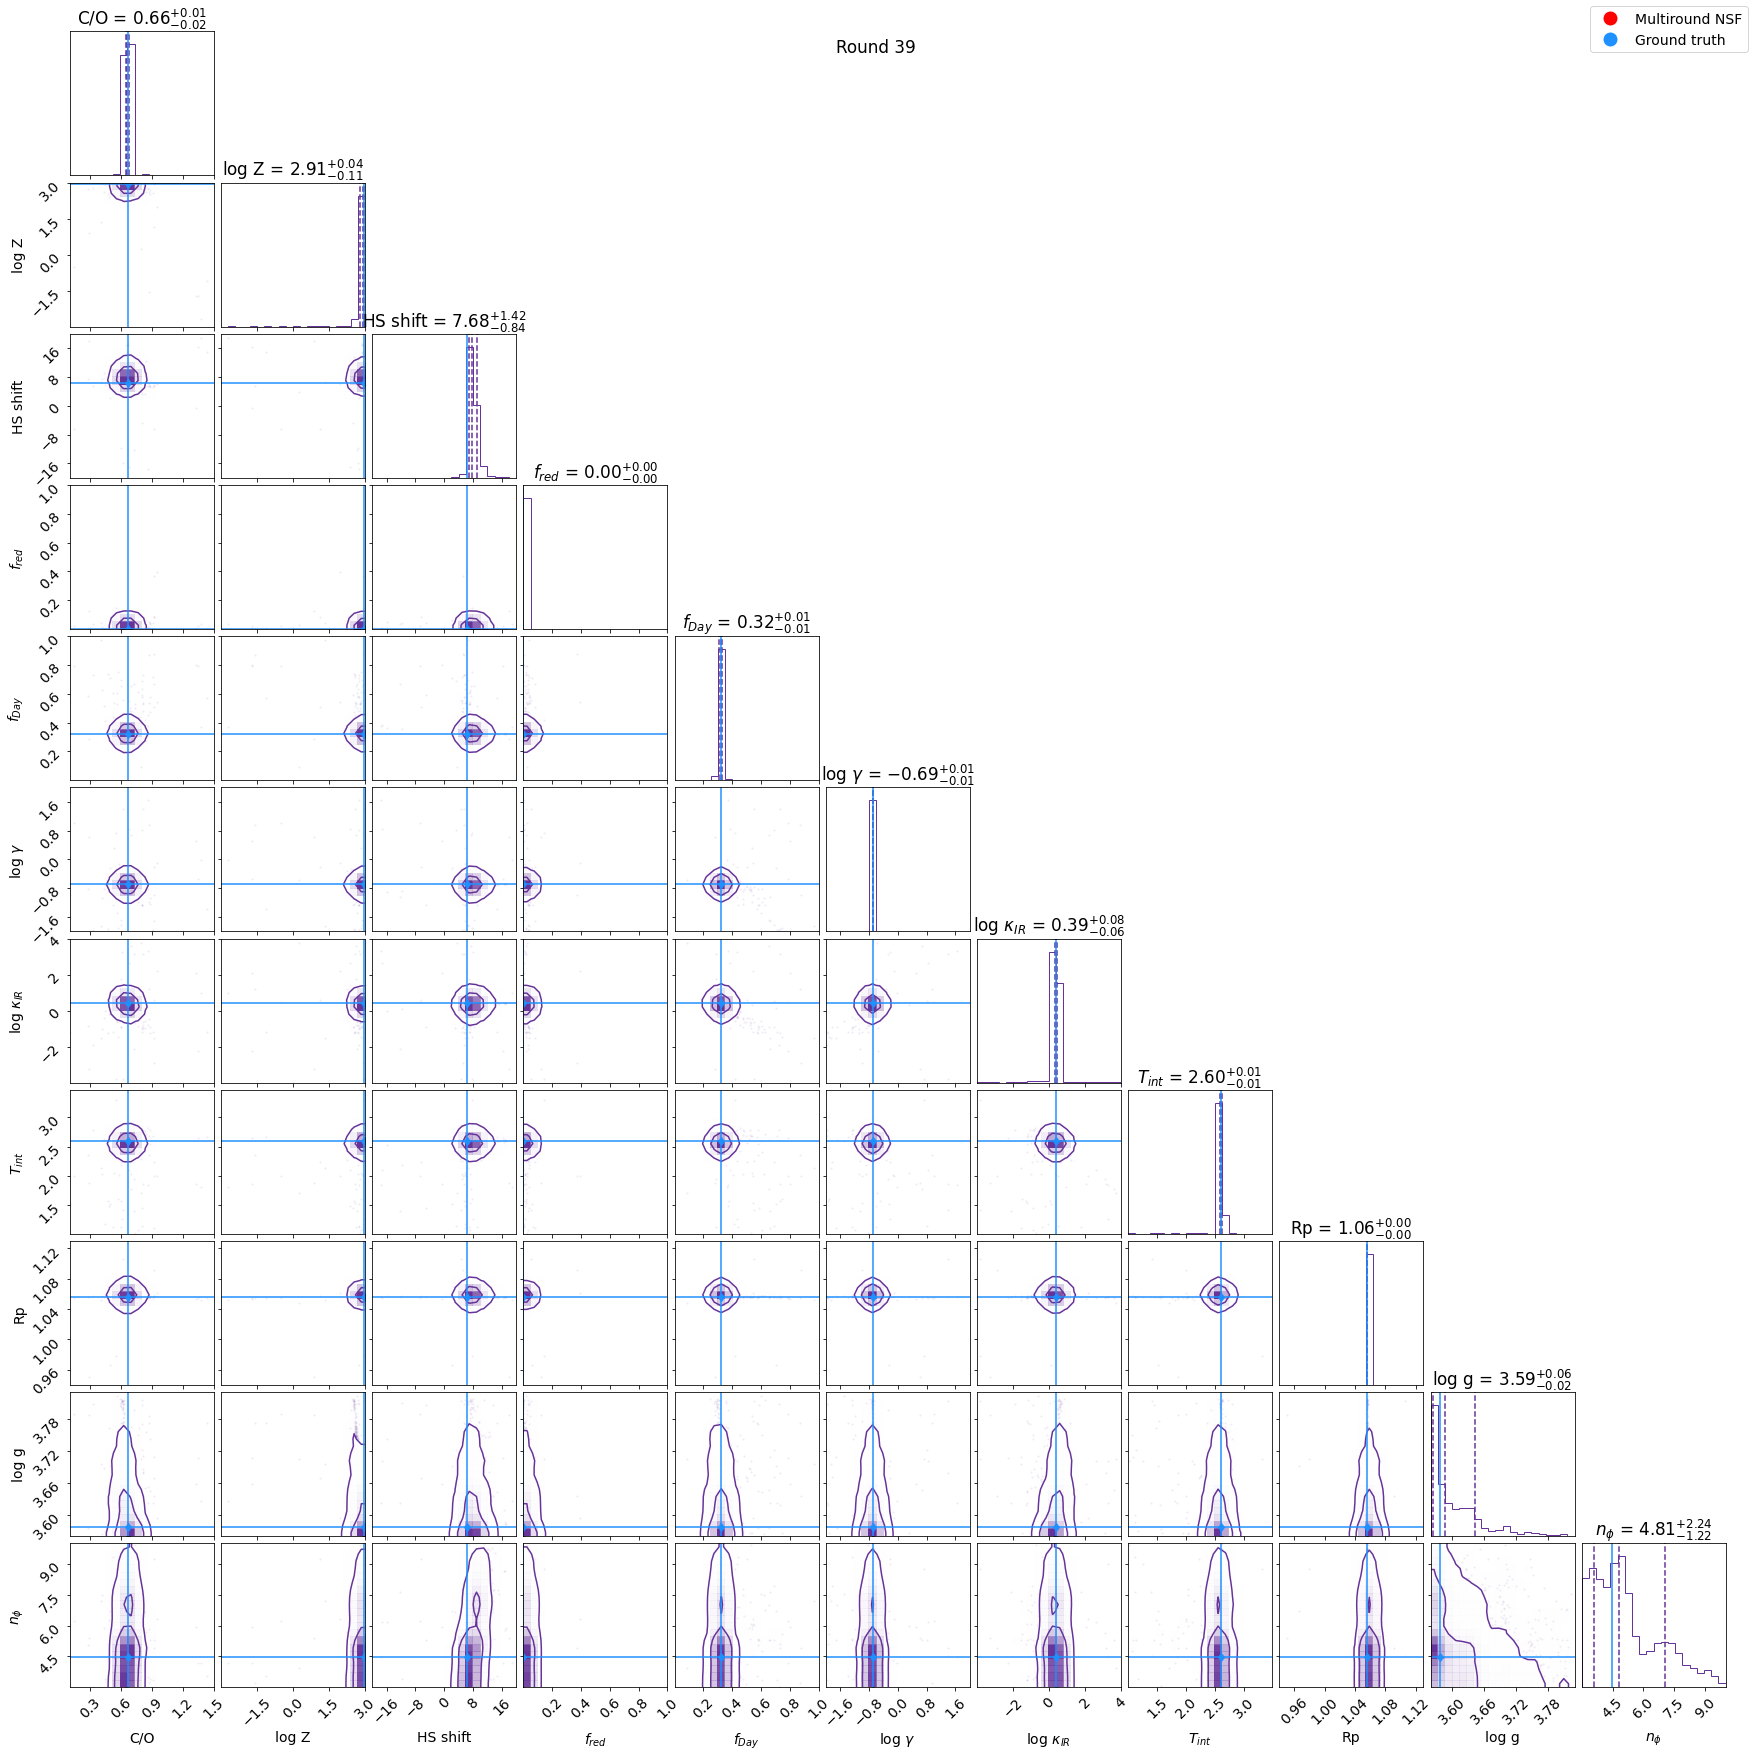

In [16]:
prior_bounds = np.loadtxt('../prior_wasp43_f.dat')

CORNER_KWARGS = dict(
    smooth = .9,
    levels = [0.68, 0.95],
    quantiles = [0.16, 0.5, 0.84],
    show_titles = True,
    labels = ['C/O', 'log Z', r'HS shift', r'$f_{red}$', r'$f_{Day}$', r'log $\gamma$', r'log $\kappa_{IR}$', 
              r'$T_{int}$', 'Rp', 'log g', r'$n_{\phi}$'],
    range = prior_bounds,
)

truths = [0.664, 2.95, 6.43, 0.000639, 0.3235, np.log10(2.064e-1), np.log10(2.54), np.log10(3.936e2), 1.0557577, 3.57768, 4.47]

# post1 = np.loadtxt('../MulteXBI_output/wasp_43b_5k_7-12/round_280_samples.dat')
ynorm = pickle.load(open('../MulteXBI_output/wasp_43b_5k_7-12//yscaler.p', 'rb'))

for r in [39]:
    post1 = ynorm.inverse_transform(np.load('../MulteXBI_output/wasp_43b_5k_7-12//Y_round_'+str(r)+'.npy'))

    figure = corner(post1, color = 'rebeccapurple', **CORNER_KWARGS)

    from matplotlib.lines import Line2D
    custom_lines = [
                    Line2D([0], [0], marker='o', markersize=15, color='w', markerfacecolor='red'),
                    Line2D([0], [0], marker='o', markersize=15, color='w', markerfacecolor='dodgerblue'),
                   ]

    figure.legend(custom_lines, [
                                'Multiround NSF', 
                               'Ground truth',
                ])

    ndim = len(prior_bounds)
    axes = np.array(figure.axes).reshape((ndim, ndim))
    value1 = [0.611, 2.501, 3.333, 0.001, 0.284, -0.738, 0.317, 2.571, 1.055, 3.586, 4.357]
    value2 = [0.681, 2.952, 7.018, 0.002, 0.351, -0.642, 0.607, 2.629, 1.057, 3.745, 9.006]

    # Loop over the diagonal
    for i in range(ndim):
        ax = axes[i, i]
        # ax.axvline(value1[i], ls='--', color="dodgerblue")
        # ax.axvline(value2[i], ls='--', color="dodgerblue")
        ax.axvline(truths[i], ls='-', color="dodgerblue")

    # Loop over the histograms
    for yi in range(ndim):
        for xi in range(yi):
            ax = axes[yi, xi]
            ax.axvline(truths[xi], color="dodgerblue")
            # ax.axvline(value2[xi], color="r")
            ax.axhline(truths[yi], color="dodgerblue")
            # ax.axhline(value2[yi], color="r")
            ax.plot(truths[xi], truths[yi], "d", color="dodgerblue")
            # ax.plot(value2[xi], value2[yi], "sr")

    # for i in range(20):
    #     fig1 = corner(post1[i], color = 'hotpink', **CORNER_KWARGS)
    figure.suptitle('Round '+str(r))

#     plt.savefig('../wasp_43_corner_'+str(r)+'.png', bbox_inches='tight')
#     plt.close('all')

In [4]:
prior_bounds

array([[ 1.000e-01,  1.500e+00],
       [-3.000e+00,  3.000e+00],
       [-2.000e+01,  2.000e+01],
       [ 0.000e+00,  1.000e+00],
       [ 1.000e-03,  1.000e+00],
       [-2.000e+00,  2.000e+00],
       [-4.000e+00,  4.000e+00],
       [ 1.000e+00,  3.478e+00],
       [ 9.400e-01,  1.130e+00],
       [ 3.560e+00,  3.830e+00],
       [ 3.000e+00,  1.000e+01]])

In [13]:
Y = np.load('../MulteXBI_output/wasp_43b_katy_2k//Y_round_0.npy')
np_theta_407=np.loadtxt('../MulteXBI_output/wasp_43b_katy_2k/np_theta_line_407.txt')

ynorm.inverse_transform(Y)[0]

array([ 1.09778786, -0.42254257,  3.4350338 ,  0.13948506,  0.31814688,
        1.88151622, -1.30999804,  2.98668957,  1.0578407 ,  3.75454926,
        4.68072653])

In [15]:
np.savetxt('../dc_round_0_samples.dat', ynorm.inverse_transform(Y))

In [23]:
wvl = np.loadtxt('../double_check/model000001/obs011')[:,0]

In [32]:
trans0 = np.load('../MulteXBI_output/wasp_43b_katy_2k/trans_round_0.npy')
trans_dc = np.loadtxt('../double_check/model000004/trans')

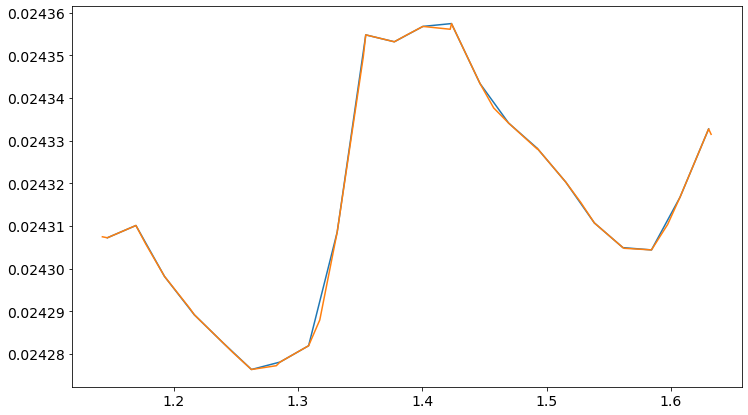

In [33]:
plt.figure(figsize=(12,7))
plt.plot(wvl, trans0[3])
plt.plot(trans_dc[:,0][:-2], trans_dc[:,1][:-2])

In [12]:
ynorm = pickle.load(open('../MulteXBI_output/J1828_PT_clear_emb/yscaler.p', 'rb'))
post = ynorm.inverse_transform(np.load('../MulteXBI_output/J1828_PT_clear_emb/Y_round_4.npy'))
bestfit = post[4889]
bestfit[0] = 10**bestfit[0]

Text(0.5, 0.98, 'Round 5')

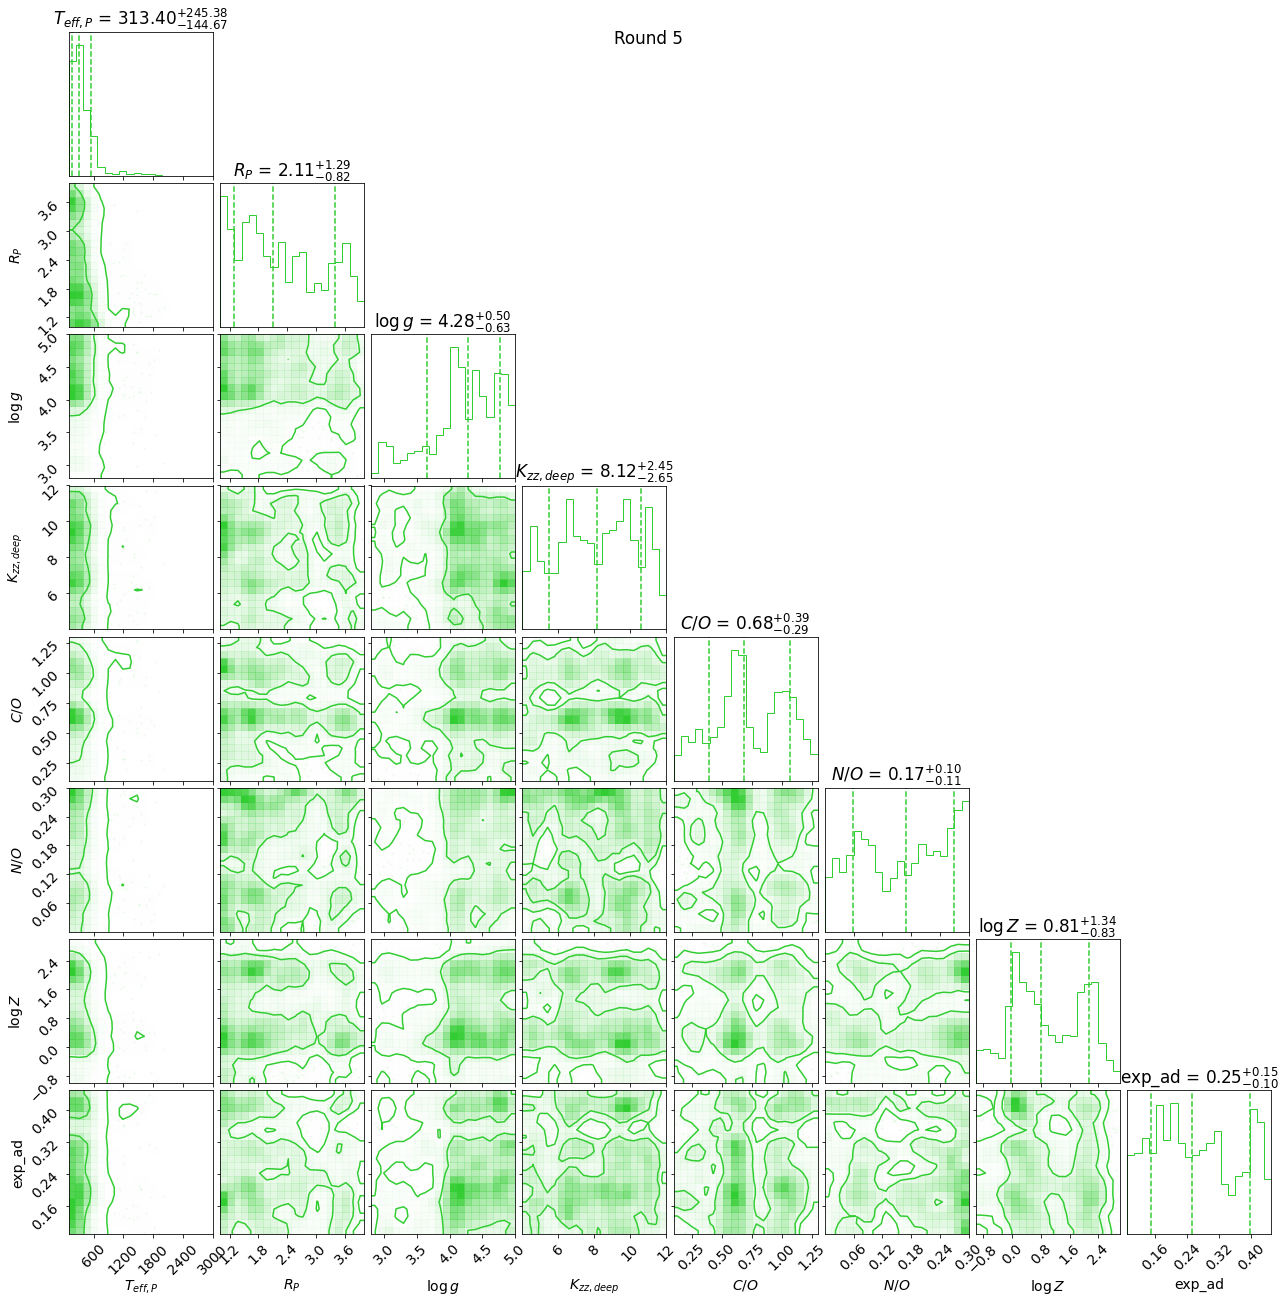

In [10]:
prior_bounds = np.loadtxt('../prior_J1828_PT_clear.dat')
prior_bounds[0,:] = 10**prior_bounds[0,:]

CORNER_KWARGS = dict(
    smooth = .9,
    levels = [0.68, 0.95],
    quantiles = [0.16, 0.5, 0.84],
    show_titles = True,
    # plot_contours=False,
    # fill_contours=False,
    # plot_density=False,
    labels = [r'$T_{eff,P}$', r'$R_P$', r'$\log g$', r'$K_{zz,deep}$', r'$C/O$', r'$N/O$', r'$\log Z$', 'exp_ad'],
    range = prior_bounds,
#     truths = bestfit
)


post1 = np.loadtxt('../MulteXBI_output/J1828_PT_clear_emb_011222/round_'+str(2)+'0_samples.dat')
# ynorm = pickle.load(open('../MulteXBI_output/J1828_PT_clear_emb/yscaler.p', 'rb'))
# post1 = ynorm.inverse_transform(np.load('../MulteXBI_output/J1828_PT_clear_emb/Y_round_3.npy'))

post1[:,0]=10**post1[:,0]

figure = corner(post1, color = 'limegreen', **CORNER_KWARGS)

figure.suptitle('Round 5')
# plt.savefig('../j1828_corner_round_5.jpg', bbox_inches='tight')

In [27]:
post1[3163]

array([ 4.64977896e+02,  1.29501414e+00,  4.90513611e+00,  6.88326502e+00,
        3.52545172e-01,  3.33784223e-02, -1.76947117e-02])

In [152]:
import pywhatkit

In [153]:
# Send a WhatsApp Message to a Contact at 1:30 PM
message = "Posterior is converging to: \
C/O = 0.664 \
log Z = 2.95 "
pywhatkit.sendwhatmsg_instantly("+31613945493", "Posterior is converging to: ", 15, True)

In [9]:
pywhatkit.sendwhats_image("+31613945493", '../corner4what.jpg', 'cool plot bro', 15, True)

2022-12-07 16:55:57.139 osascript[54061:77667373] CFURLGetFSRef was passed a URL which has no scheme (the URL will not work with other CFURL routines)


In [62]:
trans = np.load('../MulteXBI_output/wasp_43b_5k_7-12/trans_round_0.npy')
phase = np.load('../MulteXBI_output/wasp_43b_5k_7-12/phase_round_0.npy')

In [126]:
x_o = np.concatenate((trans, (phase)), axis=1)

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [123]:
xscaler = StandardScaler().fit(np.concatenate((trans, phase), axis=1))

In [132]:
x_f = xscaler.transform(np.concatenate((trans, (phase)), axis=1))

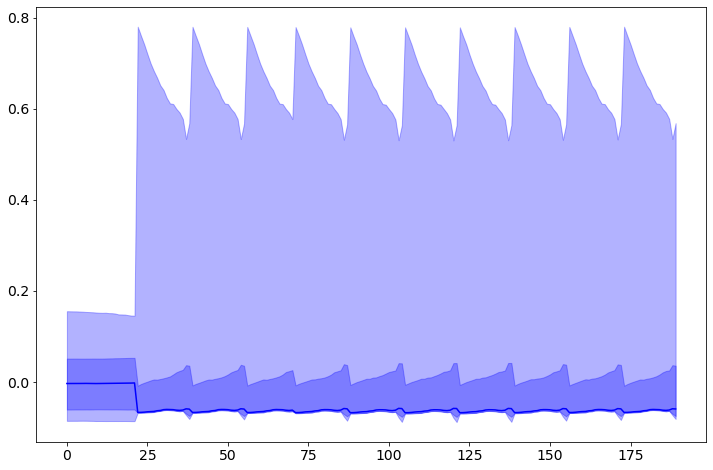

In [150]:
plt.figure(figsize=(12,8))
plt.plot(np.median(x_t,axis=0), 'b')
# plt.plot(np.median(x_o,axis=0), 'r')
plt.fill_between(np.arange(0,190), np.percentile(x_t, 16, axis=0), np.percentile(x_t, 84, axis=0), color='b', alpha=0.3)
plt.fill_between(np.arange(0,190), np.percentile(x_t, 2.2, axis=0), np.percentile(x_t, 97.8, axis=0), color='b', alpha=0.3)

In [138]:
mean = np.mean(x_o, axis=0)
std = np.std(x_o, axis=0)
var = np.var(x_o, axis=0)

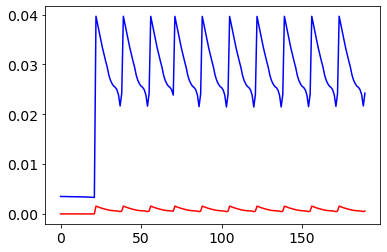

In [136]:
plt.plot(std, 'b')
plt.plot(var, 'r')

In [149]:
x_t = (x_o-mean)/np.sqrt(std)

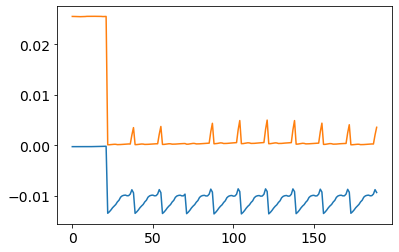

In [143]:
plt.plot(np.median(x_t,axis=0))
plt.plot(np.median(x_o,axis=0))